In [23]:
import numpy as np
import scipy.cluster
import matplotlib.pyplot as plt

data = np.loadtxt('faithful.txt', skiprows=1)[:, 1:]
data = (data - data.mean(axis=0)) / data.std(axis=0)

def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def norma(obs, centroids, labels):
    ans = 0
    for i in range(centroids.shape[0]):
        ans += abs(np.linalg.norm(obs[i==labels] - centroids[i], axis = 1).sum())
    return ans

In [24]:
def get_score(pts, centroids, labels):
    score = sum(np.linalg.norm(pts[labels == label] - centroids[label], axis=1).sum() for label in range(centroids.shape[0]))
    score = score/ pts.shape[0]
    return score

In [25]:
def kmeans(obs, k_or_guess, iter=20, thresh=1e-05):
    if isinstance(k_or_guess, np.ndarray):
        centroids = np.copy(k_or_guess)
    else:
        centroids = np.random.random((k_or_guess, obs.shape[1]))

    labels = get_labels(obs, centroids)
    score = get_score(obs, centroids, labels)

    best_score = score
    best_cntrd = centroids
    while True:
        centroids = np.array([obs[labels == label].mean(axis=0) for label in range(centroids.shape[0])])
        labels = get_labels(obs, centroids)
        old_score = score
        score = get_score(obs, centroids, labels)

        if score < best_score:
            best_score = score
            best_cntrd = centroids
        
        if not isinstance(k_or_guess, np.ndarray):
            iter -= 1
            if iter == 0:
                break
        
        if abs(score - old_score) < thresh:
            break

    return best_cntrd, best_score

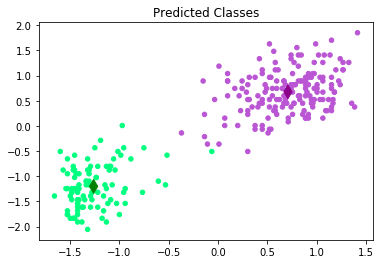

In [36]:
my_centroids, my_score = kmeans(data, 2)
my_labels = get_labels(data, my_centroids)

plt.scatter(*data.T, c=np.where(my_labels, "springgreen", "mediumorchid"), s=20)
plt.scatter(*my_centroids.T, c=["darkmagenta", "green"], s=95, marker='d')
plt.title('Predicted Classes')
plt.show()